In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotion-classification-nlp/emotion-labels-train.csv
/kaggle/input/emotion-classification-nlp/emotion-labels-val.csv
/kaggle/input/emotion-classification-nlp/emotion-labels-test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/emotion-classification-nlp/emotion-labels-train.csv')
df_val = pd.read_csv('/kaggle/input/emotion-classification-nlp/emotion-labels-val.csv')
df_test = pd.read_csv('/kaggle/input/emotion-classification-nlp/emotion-labels-test.csv')

In [3]:
df_train

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness
3609,Just put the winter duvet on ☃️❄️🌬☔️,sadness
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness
3611,@BluesfestByron second artist announcement loo...,sadness


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

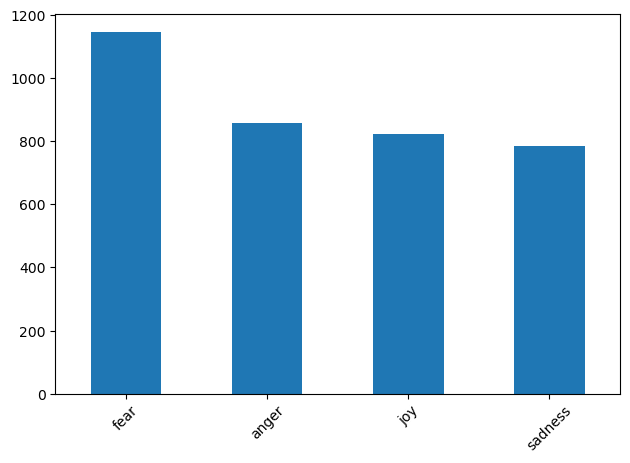

In [5]:
df_train['label'].value_counts().plot(kind = 'bar')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

## Data Cleaning

In [6]:
df_train['text']

0       Just got back from seeing @GaryDelaney in Burs...
1       Oh dear an evening of absolute hilarity I don'...
2       Been waiting all week for this game ❤️❤️❤️ #ch...
3       @gardiner_love : Thank you so much, Gloria! Yo...
4       I feel so blessed to work with the family that...
                              ...                        
3608    @VivienLloyd Thank you so much! Just home - st...
3609                Just put the winter duvet on ☃️❄️🌬☔️ 
3610    @SilkInSide @TommyJoeRatliff that's so pretty!...
3611    @BluesfestByron second artist announcement loo...
3612    I can literally eat creamy pesto pasta topped ...
Name: text, Length: 3613, dtype: object

### Removing Username Handles

In [7]:
import re

In [8]:
text = df_train['text'][0]
text

'Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious'

In [9]:
def remove_handle(text):
    string = re.sub(r"@\w+",' ', text)
    return string

In [10]:
remove_handle(text)

'Just got back from seeing   in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious'

### Removing \# Marks

In [11]:
text = df_train['text'][0]
text

'Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much #hilarious'

In [12]:
def remove_hashtag(text):
    return re.sub(r' #',', ',text)

In [13]:
remove_hashtag(text)

'Just got back from seeing @GaryDelaney in Burslem. AMAZING!! Face still hurts from laughing so much, hilarious'

### Parsing Emojis to their meaning | ♥ -> Heart

In [14]:
import emoji

In [15]:
text = df_train['text'][2]

In [16]:
def parse_emoji(text):
    return emoji.demojize(text)

In [17]:
parse_emoji(text)

'Been waiting all week for this game :red_heart::red_heart::red_heart: #cheer #friday :red_heart:'

In [18]:
df_train['text'] = df_train['text'].apply(remove_handle)
df_train['text'] = df_train['text'].apply(remove_hashtag)
df_train['text'] = df_train['text'].apply(parse_emoji)

In [19]:
df_train['text']

0       Just got back from seeing   in Burslem. AMAZIN...
1       Oh dear an evening of absolute hilarity I don'...
2       Been waiting all week for this game :red_heart...
3         : Thank you so much, Gloria! You're so sweet...
4       I feel so blessed to work with the family that...
                              ...                        
3608      Thank you so much! Just home - stunned but s...
3609    Just put the winter duvet on :snowman::snowfla...
3610        that's so pretty! I love the sky in the ba...
3611      second artist announcement looking good, blu...
3612    I can literally eat creamy pesto pasta topped ...
Name: text, Length: 3613, dtype: object

## Text PreProcessing